# **Assignment 1**

**Submission by:** <br>
Gal Mishan <br>
Tomer Erez <br>
Shahar Dvir <br>
Tal Sadot <br>


In [1]:
import pandas as pd
import numpy as np


In [2]:
#read the training file
df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/train.csv')

In [3]:
# showing the data set
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


### Handeling DateTime Feature
We believe that day in a month is not relevant and just adds noise.
However the day in the week might be relevant as people rent more bikes in the weekends than in work days. So we created a new binary feature: "isWeekend" that will be equal to one if it is Saturday or Sunday.

In [4]:
# pipeline function
def convertDateTime(df):
  # Convert 'datetime' column to pandas datetime format
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['year'] = df['datetime'].dt.year
  df['month'] = df['datetime'].dt.month
  df['hour'] = df['datetime'].dt.hour
  df['weekday'] = df['datetime'].dt.dayofweek
  df = pd.get_dummies(df, columns=['weekday'])
  df.rename(columns={'weekday_0': 'isMonday', 'weekday_1': 'isTuesday', 'weekday_2': 'isWednesday','weekday_3': 'isThursday','weekday_4': 'isFriday',
                     'weekday_5': 'isSaturday','weekday_6': 'isSunday',}, inplace=True)
  #df['isWeekday'] = np.where(df[['isMonday', 'isTuesday', 'isWednesday', 'isThursday', 'isFriday']].any(axis=1), 1, 0)
  df['isWeekend'] = np.where(df[['isSaturday', 'isSunday']].any(axis=1), 1, 0)
  columns_to_drop = ['datetime','isMonday','isTuesday','isWednesday', 'isThursday','isFriday','isSaturday','isSunday']
  df.drop(columns=columns_to_drop, inplace=True)
  return df
df = convertDateTime(df)





## One hot encoding categorical variables
We perform one-hot encoding on the 'season' and 'weather' columns.

In [5]:
#pipeline function
def oneHot(df):
  df = pd.get_dummies(df, columns=['season', 'weather'])
  return df
df=oneHot(df)


In [6]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'pollution', 'sunlight', 'traffic', 'count', 'year', 'month', 'hour',
       'isWeekend', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [7]:
df.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count,...,hour,isWeekend,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35,...,0,0,0,0,1,0,1,0,0,0
1,0,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251,...,22,0,0,1,0,0,1,0,0,0
2,0,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53,...,23,0,0,1,0,0,1,0,0,0


In [8]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count,...,hour,isWeekend,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,...,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,0.029397,0.683244,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784,...,11.522660,0.287359,0.245835,0.251225,0.249755,0.253185,0.662175,0.260289,0.077413,0.000122
std,0.168928,0.465240,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178,...,6.934732,0.452558,0.430608,0.433744,0.432898,0.434862,0.472997,0.438819,0.267262,0.011067
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000,...,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000,...,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Function to handle NA
If there are nulls fill with the column mean

In [9]:
#pipeline function
def ifAnyNull(df):
  if df.isnull().values.any()==False:
    df.fillna(df.mean(), inplace=True)
  return df
df=ifAnyNull(df)


## Pearson matrix


<Axes: title={'center': 'Pearson Correlation Heatmap'}>

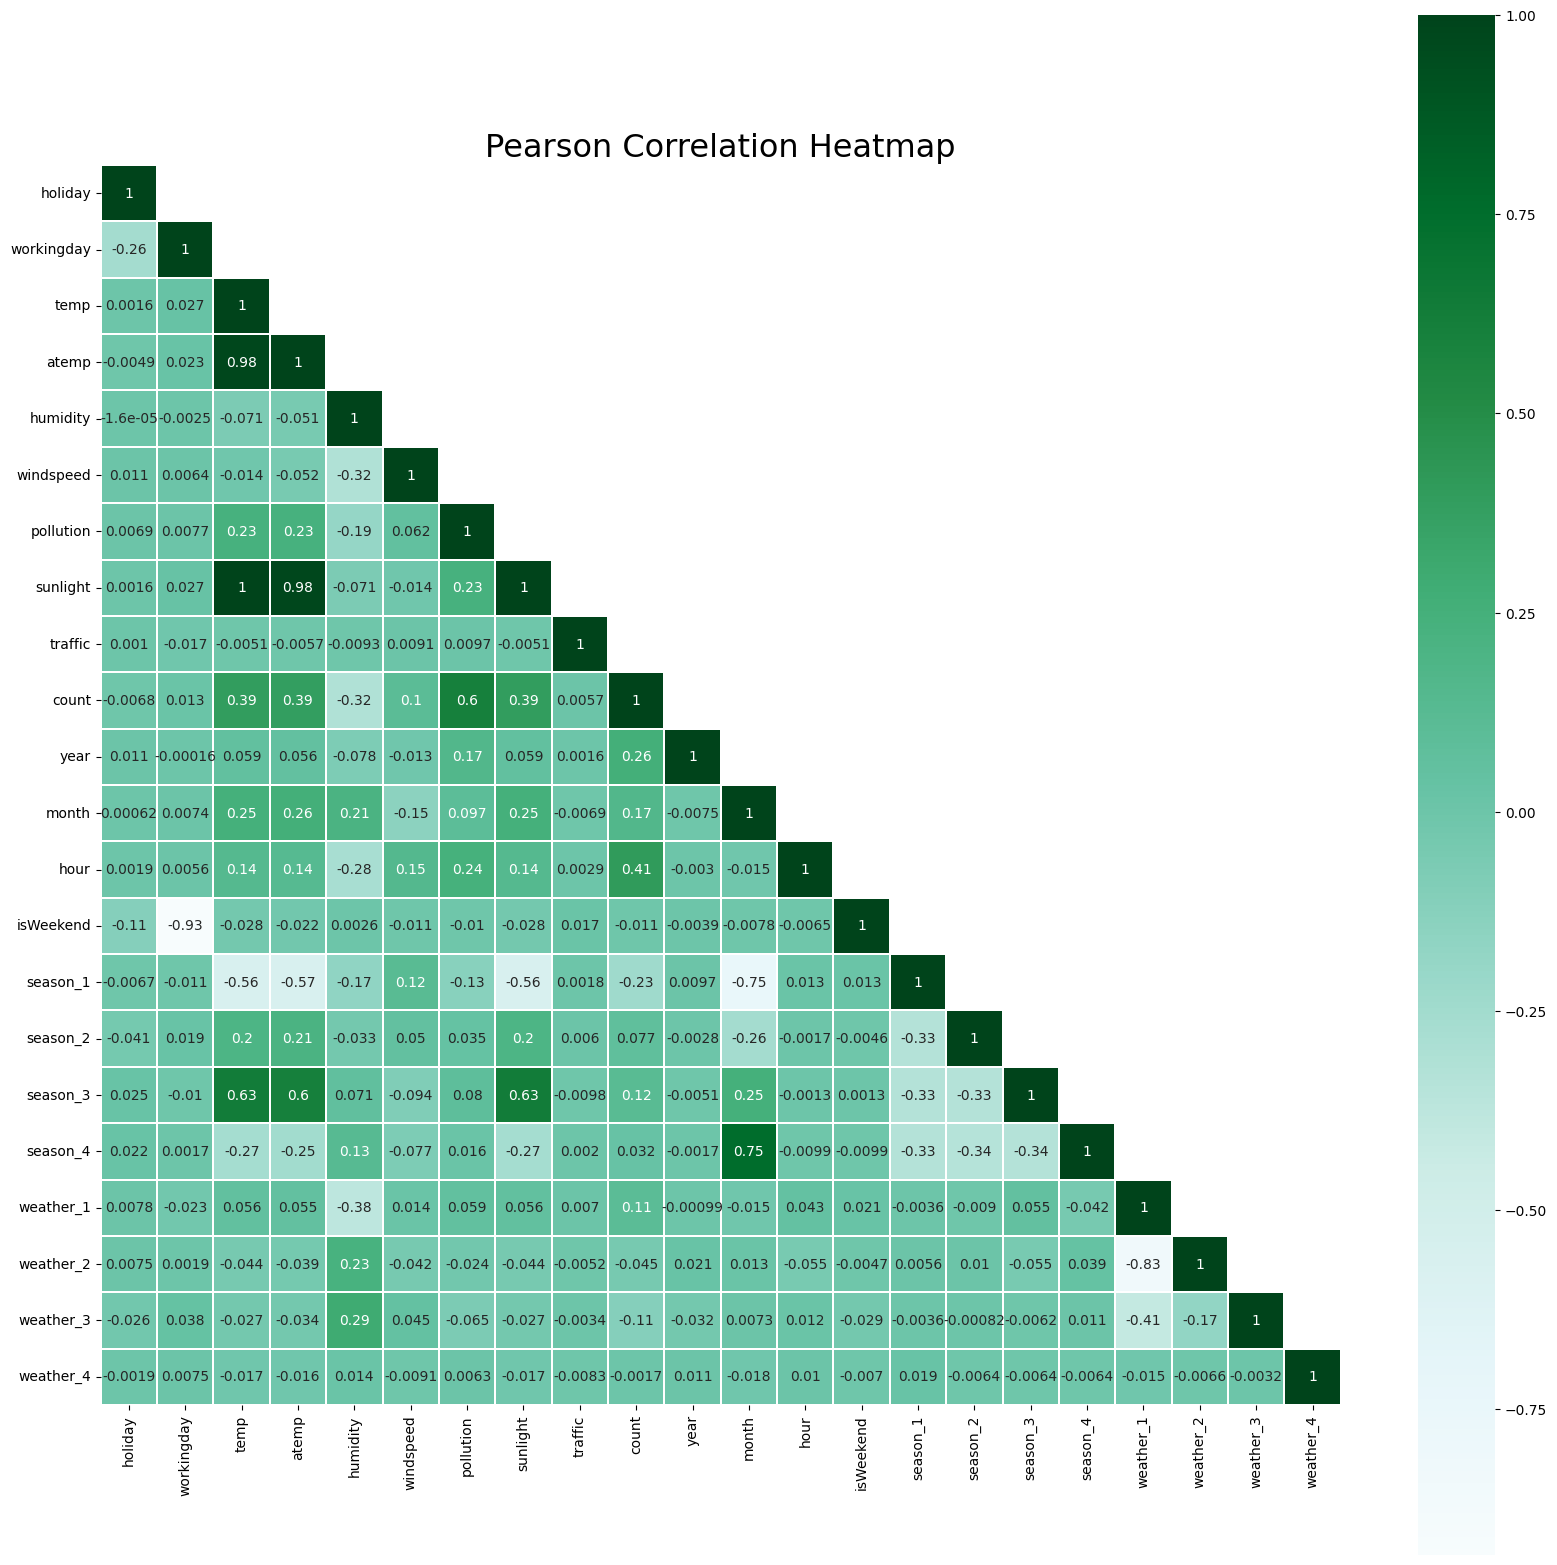

In [10]:
correlations = df.corr()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

As we expected, hour is highly correlated with the target, because you dont rent bikes during the night. We were also surprised to find that the variable "pollution" is strongly correlated with the target variable and the new feature 'isWeekend' is not correlated with 'count'.
In addition, it can be seen that the variables "temp", "atemp" and "sunlight" are also correlated with the target variable "Count". This makes sense because in low temperatures and on days without sunlight, people are less likely to rent bikes.

But this 3 columns are perfectly correlated between them. We will drop temp and atemp then.

In [11]:
#pipeline function
def dropCorrelatedColumns(df):
  columns_to_drop = ['temp', 'atemp']
  df.drop(columns=columns_to_drop, inplace=True)
  return df
df=dropCorrelatedColumns(df)



In [12]:
#pipeline function
def xySplit(df):
  X = df.drop(['count'], axis=1)
  Y = df[['count']]
  Y = Y.values.ravel()
  X, Y
  return X,Y
X,Y= xySplit(df)


### Split the Data

In [13]:
from sklearn.model_selection import train_test_split
# for pipeline
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models list

In [14]:
models = {'randomForest' : None,'gradientBoosting': None ,'XGBoost' : None}

Our data is tabular, so we chose tree-based models that are suitable for this type of tasks. Also, for each model we will perform a GridSearch in order to find the optimal hyperparameters for our problem. In addition, we would like to know which features are the most important in each model. After that we calculate the RMSE index for each model which will tell us whether the model we created is good enough.

Let's define a plot feature importance function to be used in each model

In [15]:
def plotFeatureImportance(X_train,feature_importances,model_name):
    feature_names = X_train.columns

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.title(f'{model_name} Feature Importance')
    plt.show()


# Model 1: random forest

[1.78861455e-03 2.42207024e-02 4.05502782e-02 1.26482941e-02
 2.18145814e-01 7.66257997e-02 6.03297033e-03 6.13686194e-02
 3.17227500e-02 4.75375901e-01 2.07872250e-02 1.25861897e-02
 1.52887385e-03 1.49381107e-03 2.47276699e-03 2.87548705e-03
 1.92873107e-03 7.84518931e-03 1.98197275e-06]
Best parameters: {'cv': 3, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': None, 'estimator__max_features': 1.0, 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 200, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 42, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(n_estimators=200, random_state=42), 'n_jobs': None, 'param_grid': 

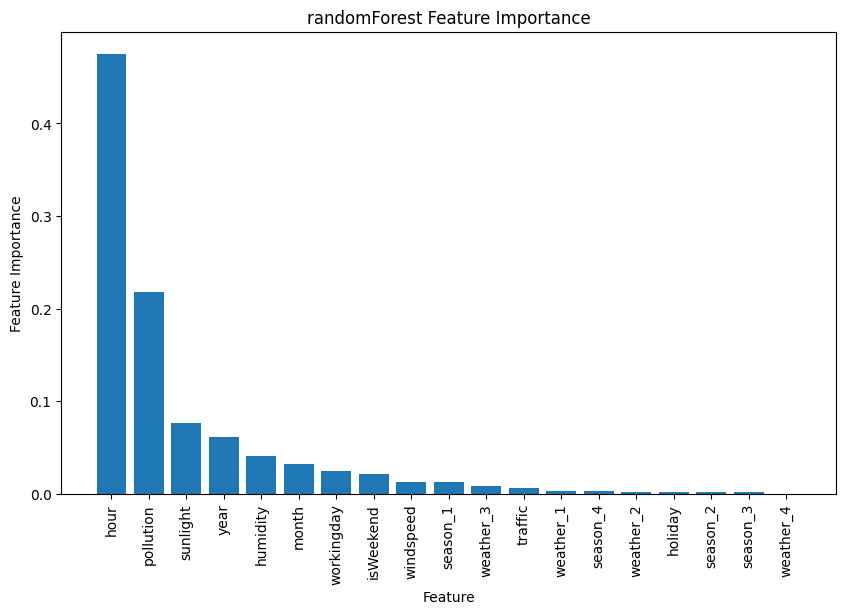

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time
def runRandomForest(X_train, Y_train, X_test, Y_test):
    start= time.time()
    # Define the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

    # Define the parameter grid
    param_grid = {
        'max_features': [1.0, 2/3, 1/3],
        'bootstrap': [True, False],
        'min_samples_leaf': [1, 3],

    }

    # defining a grid search
    grid_search = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0, refit=True)

    # Fit the model
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params = grid_search.get_params()

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Evaluateing our best model on the test set
    y_pred = best_rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    # Get feature importances
    feature_importances = best_rf_model.feature_importances_
    print(feature_importances)
    print("Best parameters:", best_params)
    print("Best model RMSE on test set:", rmse)

    plotFeatureImportance(X_train,feature_importances,'randomForest')
    stop= time.time()

    # Get indices of the top 3 values
    top_indices = feature_importances.argsort()[-3:][::-1]

    # Get corresponding column names from X_train
    top_3_feature_names = X_train.columns[top_indices]

    return best_params, rmse, top_3_feature_names,(stop-start),best_rf_model
models['randomForest']=(runRandomForest(X_train, Y_train, X_test, Y_test))



It can be seen that similar to the correlation matrix, the three most important features are - 'hour', 'pollution' and 'sunlight'. Also, contrary to what we thought, the effect of the new feature 'isWeekend' is not significant.

# Model 2: Gradient Boosting

Feature importances: [6.01777041e-04 5.25723240e-02 2.32212296e-02 4.08495229e-03
 2.26935614e-01 7.39220888e-02 8.35034206e-04 5.74481145e-02
 3.00753281e-02 4.94783546e-01 1.98978055e-02 3.05134742e-03
 7.38939126e-04 3.38229132e-04 1.11130586e-04 1.90469342e-03
 4.01419084e-04 9.02540153e-03 5.10260973e-05]
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 4, 'subsample': 0.8}
Best model RMSE on test set: 49.12879171481875


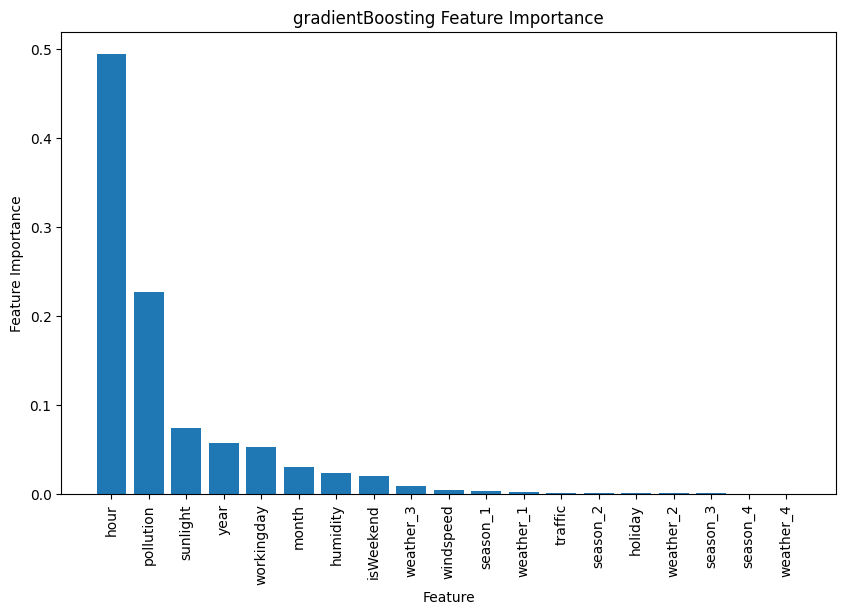

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time
import numpy as np
import matplotlib.pyplot as plt

def runGradientBoosting(X_train, Y_train, X_test, Y_test):
    start = time.time()

    # Define the Gradient Boosting model
    gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0],
        'min_samples_split': [2, 3, 4],
    }

    # defining a grid search
    grid_search = GridSearchCV(gradient_boosting_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0, refit=True)

    # Fit the model
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Get the best model
    best_gradient_boosting_model = grid_search.best_estimator_

    # Evaluating our best model on the test set
    y_pred = best_gradient_boosting_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

    # Get feature importances
    feature_importances = best_gradient_boosting_model.feature_importances_
    print("Feature importances:", feature_importances)

    print("Best parameters:", best_params)
    print("Best model RMSE on test set:", rmse)

    plotFeatureImportance(X_train,feature_importances,'gradientBoosting')
    stop = time.time()

    # Get indices of the top 3 values
    top_indices = feature_importances.argsort()[-3:][::-1]

    # Get corresponding column names from X_train
    top_3_feature_names = X_train.columns[top_indices]

    return best_params, rmse, top_3_feature_names, (stop - start), best_gradient_boosting_model


models['gradientBoosting'] = runGradientBoosting(X_train, Y_train, X_test, Y_test)


Here too, the three most important features are 'hour', 'pollution' and 'sunlight'.On the other hand, the RMSE in this model is better than Random Forest.

# Model 3: XG Boost

[0.00968126 0.0896424  0.01401126 0.00600493 0.0980688  0.04164005
 0.00416075 0.16581571 0.05996718 0.24239534 0.09922765 0.02642659
 0.00742527 0.02841836 0.03153601 0.01685755 0.00611667 0.0485728
 0.00403148]
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.8}
Best model RMSE on test set: 46.497943455776415


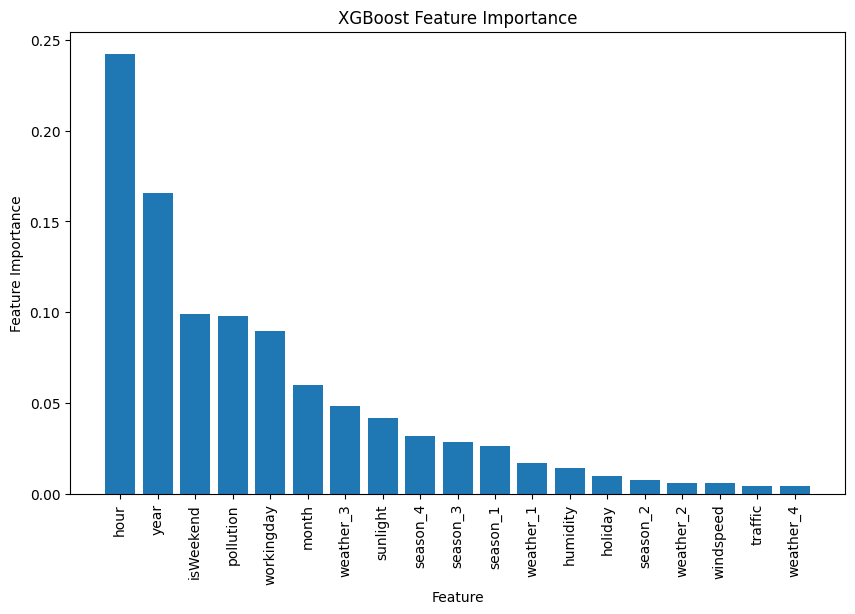

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time
import numpy as np

def runXGBoost(X_train, Y_train, X_test, Y_test):
    start = time.time()
    # Define the XGBoost model
    xgb_model = XGBRegressor(n_estimators=200, random_state=42)

    # Define the parameter grid
    param_grid = {
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 1e-2, 1e-3],
        'reg_lambda': [0, 1e-2, 1e-3],
    }

    # defining a grid search
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0, refit=True)

    # Fit the model
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Get the best model
    best_xgb_model = grid_search.best_estimator_

    # Evaluate our best model on the test set
    y_pred = best_xgb_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

    # Get feature importances
    feature_importances = best_xgb_model.feature_importances_
    print(feature_importances)
    print("Best parameters:", best_params)
    print("Best model RMSE on test set:", rmse)

    plotFeatureImportance(X_train, feature_importances, 'XGBoost')

    stop = time.time()

    # Get indices of the top 3 values
    top_indices = feature_importances.argsort()[-3:][::-1]

    # Get corresponding column names from X_train
    top_3_feature_names = X_train.columns[top_indices]

    return best_params, rmse, top_3_feature_names, (stop - start), best_xgb_model

models['XGBoost'] = runXGBoost(X_train, Y_train, X_test, Y_test)

According to the RMSE result, this is an excellent model. This is the best result among the three models. Also in this model the most important feature is "hour". But unlike the two previous models, the features - 'year' and 'isWeekend' have an effect on the model. This is in contrast to the correlation matrix, where there was no match between the new feature 'isWeekend' we created and the target variable.

# Prediction on test set

In [19]:
def pipeline(df):
  df = convertDateTime(df)
  df = oneHot(df)
  df = ifAnyNull(df)
  df = dropCorrelatedColumns(df)
  X_test,Y_test = xySplit(df)
  return df,X_test,Y_test



In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,10.317020,33.621,0.015615,127
1,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,3.502209,4.101,0.004489,13
2,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,25.945915,9.841,0.000000,163
3,2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,116.935908,29.521,0.004489,233
4,2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,120.824789,25.421,0.015615,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,2011-03-19 15:00:00,1,0,0,1,20.50,24.240,29,27.9993,44.665581,20.501,0.000242,313
2718,2012-01-08 16:00:00,1,0,0,1,16.40,20.455,37,19.9995,31.090380,16.401,0.000000,314
2719,2011-07-11 05:00:00,3,0,1,1,27.06,31.060,74,8.9981,1.075298,27.061,0.015615,26
2720,2011-07-16 08:00:00,3,0,0,1,27.06,31.060,65,11.0014,2.291586,27.061,0.004489,127


In [21]:
df,x_test,y_test = pipeline(df)

In [22]:
# we noticed that the test set has no values 4 in the weather column and we found that it is the l
x_test['weather_4']=0

### Calculate  Test RMSE

In [23]:
y_pred =  models['randomForest'][-1].predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_rmse


48.41800300648437

In [24]:
y_pred =  models['XGBoost'][-1].predict(x_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_rmse

42.76951533497332

In [25]:
y_pred =  models['gradientBoosting'][-1].predict(x_test)
gradient_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gradient_rmse

45.50334340960554

In [26]:
## for all models
#added
added = ['year','isWeekend','Month','hour']
#removed
removed = ["datetime",'temp', 'atemp']

results = {'model': ['randomForest', 'gradientBoosting', 'XGBoost'],
           'Score (RMSE)': ["{:.4f}".format(rf_rmse),"{:.4f}".format(gradient_rmse), "{:.4f}".format(xgb_rmse)],
           'Hyperparams used': [models['randomForest'][0],models['gradientBoosting'][0], models['XGBoost'][0]],
           'Features dropped': [removed, removed, removed],
           'New features created': [added, added, added],
           'Runtime trainining + inference (seconds)': [models['randomForest'][-2], models['gradientBoosting'][-2], models['XGBoost'][-2]],
           'Hardware used (GPU/CPU/TPU)': ['TPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)': [list(models['randomForest'][2]), list(models['gradientBoosting'][2]), list(models['XGBoost'][2])]
           }
results_df = pd.DataFrame(results)
results_df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,randomForest,48.4180,"{'cv': 3, 'error_score': nan, 'estimator__boot...","[datetime, temp, atemp]","[year, isWeekend, Month, hour]",125.775529,TPU,"[hour, pollution, sunlight]"
1,gradientBoosting,45.5033,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...","[datetime, temp, atemp]","[year, isWeekend, Month, hour]",122.186600,GPU,"[hour, pollution, sunlight]"
2,XGBoost,42.7695,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...","[datetime, temp, atemp]","[year, isWeekend, Month, hour]",394.333878,GPU,"[hour, year, isWeekend]"


In [27]:
import os
results_df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))